In [1]:
import os
import pandas as pd
import numpy as np
import anndata
import time
import matplotlib.pyplot as plt
import json
import requests
import pickle
import gzip as gz

import sys
sys.path.insert(1, '/home/jw3514/Work/CellType_Psy/src/')
from CellType_PSY import *

/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


#### Functions

In [2]:
def SaveDict(Dict, fname):
    with open(fname, 'wb') as hand:
        pickle.dump(Dict, hand)
    return

def LoadDict(fname):
    with open(fname, 'rb') as hand:
        b = pickle.load(hand)
        return b

# Seperate V2 and V3 data

In [3]:
cell_extended = pd.read_csv("dat/cell_metadata_with_cluster_annotation.csv")

/tmp/ipykernel_59791/2665016588.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  cell_extended = pd.read_csv("dat/cell_metadata_with_cluster_annotation.csv")


In [5]:
cell_extended.columns.values

array(['Unnamed: 0', 'cell_label', 'cell_barcode',
       'barcoded_cell_sample_label', 'library_label',
       'feature_matrix_label', 'entity', 'brain_section_label',
       'library_method', 'region_of_interest_acronym', 'donor_label',
       'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y',
       'cluster_alias', 'neurotransmitter', 'class', 'subclass',
       'supertype', 'cluster', 'neurotransmitter_color', 'class_color',
       'subclass_color', 'supertype_color', 'cluster_color',
       'region_of_interest_order', 'region_of_interest_color'],
      dtype=object)

In [6]:
cell_extended["library_label"]

0          L8TX_201030_01_C12
1          L8TX_201029_01_E10
2          L8TX_201030_01_C12
3          L8TX_201029_01_A10
4          L8TX_201030_01_C12
                  ...        
4042971    L8XR_220728_01_A05
4042972    L8XR_220728_01_A05
4042973    L8XR_220728_01_A05
4042974    L8XR_220630_02_B10
4042975    L8XR_220630_02_B10
Name: library_label, Length: 4042976, dtype: object

In [8]:
#label="subclass"
library_label = cell_extended["dataset_label"].unique()
library_label.sort()
library_label

array(['WMB-10XMulti', 'WMB-10Xv2', 'WMB-10Xv3'], dtype=object)

In [12]:
subclass = "046 Vip Gaba"
tmp = cell_extended[cell_extended["subclass"]==subclass]
tmp["feature_matrix_label"].value_counts()

WMB-10Xv2-Isocortex-4    26665
WMB-10Xv2-Isocortex-1    12039
WMB-10Xv3-Isocortex-1     6308
WMB-10Xv3-HPF             4115
WMB-10Xv2-HPF             4099
WMB-10Xv3-Isocortex-2     3983
WMB-10Xv2-OLF             1958
WMB-10Xv3-CTXsp           1111
WMB-10Xv2-CTXsp            970
WMB-10Xv3-STR              538
WMB-10Xv3-OLF              455
WMB-10Xv3-PAL              152
WMB-10Xv3-HY                21
WMB-10Xv3-MB                 9
WMB-10Xv3-TH                 8
WMB-10Xv2-Isocortex-3        7
WMB-10Xv2-HY                 6
WMB-10Xv2-TH                 2
WMB-10Xv2-Isocortex-2        1
Name: feature_matrix_label, dtype: int64

In [13]:
subclass = "256 SPVC Mafa Glut"
tmp = cell_extended[cell_extended["subclass"]==subclass]
tmp["feature_matrix_label"].value_counts()

WMB-10Xv3-MY    3388
Name: feature_matrix_label, dtype: int64

In [15]:
subclass = "280 NLL-po Pax7 Gaba"
tmp = cell_extended[cell_extended["subclass"]==subclass]
tmp["feature_matrix_label"].value_counts()

WMB-10XMulti    17
Name: feature_matrix_label, dtype: int64

In [16]:
subclass = "254 VCO Mafa Meis2 Glut"
tmp = cell_extended[cell_extended["subclass"]==subclass]
tmp["feature_matrix_label"].value_counts()

WMB-10XMulti    490
WMB-10Xv3-MY    128
WMB-10Xv3-P       1
Name: feature_matrix_label, dtype: int64

In [17]:
subclass = "039 OB Meis2 Thsd7b Gaba"
tmp = cell_extended[cell_extended["subclass"]==subclass]
tmp["feature_matrix_label"].value_counts()

WMB-10Xv3-OLF            1239
WMB-10Xv2-OLF             614
WMB-10Xv3-STR             109
WMB-10Xv3-CTXsp            82
WMB-10Xv3-PAL              48
WMB-10Xv2-Isocortex-1      45
WMB-10Xv3-Isocortex-1      22
WMB-10Xv2-CTXsp             3
WMB-10Xv2-TH                1
Name: feature_matrix_label, dtype: int64

In [19]:

###  Test similarity of same CT from V2 and V3

In [21]:
DIR = "/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/AggregatedExpMat/"
Exp_v2_Isocortex_1 = pd.read_csv(DIR + "ExpMat.WMB-10Xv2-Isocortex-1.subclass.csv", index_col=0)
Exp_v2_Isocortex_2 = pd.read_csv(DIR + "ExpMat.WMB-10Xv2-Isocortex-2.subclass.csv", index_col=0)
Exp_v2_Isocortex_3 = pd.read_csv(DIR + "ExpMat.WMB-10Xv2-Isocortex-3.subclass.csv", index_col=0)
Exp_v2_Isocortex_4 = pd.read_csv(DIR + "ExpMat.WMB-10Xv2-Isocortex-4.subclass.csv", index_col=0)
Exp_v3_Isocortex_1 = pd.read_csv(DIR + "ExpMat.WMB-10Xv3-Isocortex-1.subclass.csv", index_col=0)
Exp_v3_Isocortex_2 = pd.read_csv(DIR + "ExpMat.WMB-10Xv3-Isocortex-2.subclass.csv", index_col=0)

In [102]:
#CT = "046 Vip Gaba"
#CT = "053 Sst Gaba"
CT = "052 Pvalb Gaba"
#CT = "021 L4 RSP-ACA Glut"
#CT = "004 L6 IT CTX Glut"
#CT = "005 L5 IT CTX Glut"

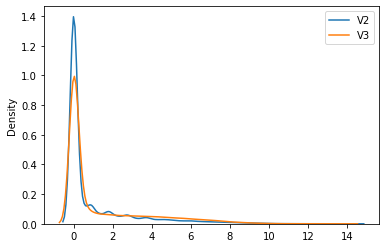

In [103]:
dat_v2 = np.concatenate([Exp_v2_Isocortex_1[CT].values, Exp_v2_Isocortex_2[CT].values,
                        Exp_v2_Isocortex_3[CT].values, Exp_v2_Isocortex_4[CT].values])
dat_v3 = np.concatenate([Exp_v3_Isocortex_1[CT].values, Exp_v3_Isocortex_2[CT].values])
sns.kdeplot(dat_v2, label="V2")
sns.kdeplot(dat_v3, label="V3")
plt.legend()

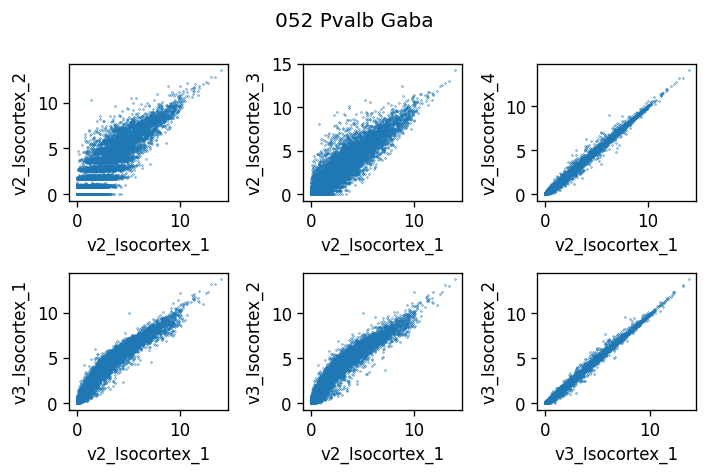

In [104]:
fig, ax = plt.subplots(2,3, dpi=120)
ax[0,0].scatter(Exp_v2_Isocortex_1[CT].values, Exp_v2_Isocortex_2[CT].values, s=0.1)
ax[0,0].set_xlabel("v2_Isocortex_1"); ax[0,0].set_ylabel("v2_Isocortex_2")
ax[0,1].scatter(Exp_v2_Isocortex_1[CT].values, Exp_v2_Isocortex_3[CT].values, s=0.1)
ax[0,1].set_xlabel("v2_Isocortex_1"); ax[0,1].set_ylabel("v2_Isocortex_3")
ax[0,2].scatter(Exp_v2_Isocortex_1[CT].values, Exp_v2_Isocortex_4[CT].values, s=0.1)
ax[0,2].set_xlabel("v2_Isocortex_1"); ax[0,2].set_ylabel("v2_Isocortex_4")
ax[1,0].scatter(Exp_v2_Isocortex_1[CT].values, Exp_v3_Isocortex_1[CT].values, s=0.1)
ax[1,0].set_xlabel("v2_Isocortex_1"); ax[1,0].set_ylabel("v3_Isocortex_1")
ax[1,1].scatter(Exp_v2_Isocortex_1[CT].values, Exp_v3_Isocortex_2[CT].values, s=0.1)
ax[1,1].set_xlabel("v2_Isocortex_1"); ax[1,1].set_ylabel("v3_Isocortex_2")
ax[1,2].scatter(Exp_v3_Isocortex_1[CT].values, Exp_v3_Isocortex_2[CT].values, s=0.1)
ax[1,2].set_xlabel("v3_Isocortex_1"); ax[1,2].set_ylabel("v3_Isocortex_2")
fig.suptitle(CT, fontsize=12)
plt.tight_layout()



In [107]:
Exp_v2_HPF = pd.read_csv(DIR + "ExpMat.WMB-10Xv2-HPF.subclass.csv", index_col=0)
Exp_v3_HPF = pd.read_csv(DIR + "ExpMat.WMB-10Xv3-HPF.subclass.csv", index_col=0)

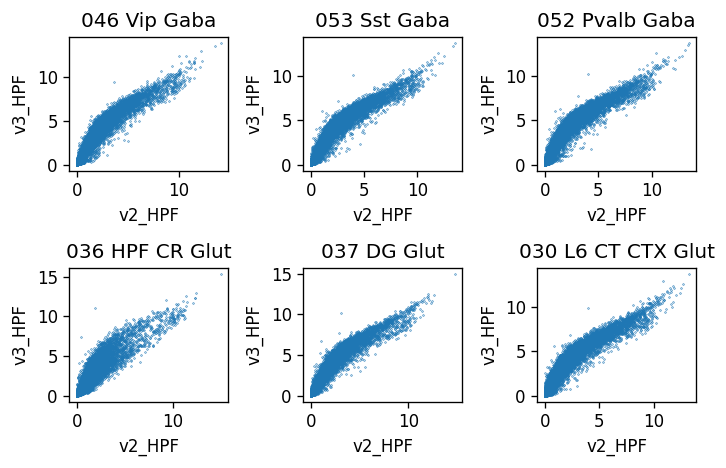

In [116]:
CTs = ["046 Vip Gaba", "053 Sst Gaba", "052 Pvalb Gaba",
       "036 HPF CR Glut", "037 DG Glut", "030 L6 CT CTX Glut"]
fig, axs = plt.subplots(2,3, dpi=120)
for nn, ax in enumerate(axs.flat):
    ax.scatter(Exp_v2_HPF[CTs[nn]].values, Exp_v3_HPF[CTs[nn]].values, s=0.1)
    ax.set_xlabel("v2_HPF"); ax.set_ylabel("v3_HPF")
    ax.set_title(CTs[nn])
#fig.suptitle(CT, fontsize=12)
plt.tight_layout()

## Check Cell Number

In [120]:
ClusterMeta = pd.read_excel("/home/jw3514/Work/data/Allen_Mouse_Brain_Cell_Atlas/SuppTables/41586_2023_6812_MOESM8_ESM.xlsx", 
                            index_col="cluster_id", sheet_name="cluster_annotation")

In [121]:
ClusterMeta.head(2)

,cl,cluster_id_label,supertype_id,supertype_label,supertype_id_label,subclass_id,subclass_label,subclass_id_label,class_id,class_label,...,CTX.subclass_id,CTX.subclass_id.1,CTX.neighborhood_id,CTX.neighborhood_label,CTX.size,taxonomy_id,cell_set_accession.cluster,cell_set_accession.supertype,cell_set_accession.subclass,cell_set_accession.class
cluster_id,,,,,,,,,,,,,,,,,,,,,
1,128,0001 CLA-EPd-CTX Car3 Glut_1,1,CLA-EPd-CTX Car3 Glut_1,0001 CLA-EPd-CTX Car3 Glut_1,1,CLA-EPd-CTX Car3 Glut,001 CLA-EPd-CTX Car3 Glut,1,IT-ET Glut,...,21.0,Car3,4.0,L4_5_6_IT_Car3,1937.0,CCN202307220,CS20230722_CLUS_0001,CS20230722_SUPT_0001,CS20230722_SUBC_001,CS20230722_CLAS_01
2,129,0002 CLA-EPd-CTX Car3 Glut_1,1,CLA-EPd-CTX Car3 Glut_1,0001 CLA-EPd-CTX Car3 Glut_1,1,CLA-EPd-CTX Car3 Glut,001 CLA-EPd-CTX Car3 Glut,1,IT-ET Glut,...,21.0,Car3,4.0,L4_5_6_IT_Car3,1712.0,CCN202307220,CS20230722_CLUS_0002,CS20230722_SUPT_0001,CS20230722_SUBC_001,CS20230722_CLAS_01


In [122]:
ClusterMeta["TotalCell"] = ClusterMeta["v3.size"] + ClusterMeta["v2.size"]

In [128]:
print(ClusterMeta[ClusterMeta["TotalCell"]>10].shape[0])
print(ClusterMeta[ClusterMeta["TotalCell"]>100].shape[0])
print(ClusterMeta[ClusterMeta["TotalCell"]>1000].shape[0])

5285
3039
458


In [129]:
ClusterMeta[ClusterMeta["TotalCell"]>10].groupby("neighborhood")

In [132]:
count_result = ClusterMeta[ClusterMeta["TotalCell"]>10]['neighborhood'].value_counts()
count_result

MB-HB-Glut-Sero-Dopa               1416
MB-HB-CB-GABA                      1018
HY-EA-Glut-GABA                    1009
Subpallium-GABA                     551
Pallium-Glut                        501
Subpallium-GABA;HY-EA-Glut-GABA     395
TH-EPI-Glut                         148
NN-IMN-GC                           125
Subpallium-GABA;NN-IMN-GC           105
Pallium-Glut;NN-IMN-GC               16
MB-HB-Glut-Sero-Dopa;NN-IMN-GC        1
Name: neighborhood, dtype: int64

In [133]:
count_result = ClusterMeta[ClusterMeta["TotalCell"]>100]['neighborhood'].value_counts()
count_result

HY-EA-Glut-GABA                    693
MB-HB-Glut-Sero-Dopa               485
Pallium-Glut                       470
Subpallium-GABA                    411
MB-HB-CB-GABA                      395
Subpallium-GABA;HY-EA-Glut-GABA    245
TH-EPI-Glut                        134
NN-IMN-GC                          102
Subpallium-GABA;NN-IMN-GC           89
Pallium-Glut;NN-IMN-GC              14
MB-HB-Glut-Sero-Dopa;NN-IMN-GC       1
Name: neighborhood, dtype: int64

In [134]:
count_result = ClusterMeta[ClusterMeta["TotalCell"]>500]['neighborhood'].value_counts()
count_result

Pallium-Glut                       309
Subpallium-GABA                    175
HY-EA-Glut-GABA                     71
TH-EPI-Glut                         62
NN-IMN-GC                           57
MB-HB-CB-GABA                       41
Subpallium-GABA;NN-IMN-GC           40
MB-HB-Glut-Sero-Dopa                40
Subpallium-GABA;HY-EA-Glut-GABA     22
Pallium-Glut;NN-IMN-GC               8
MB-HB-Glut-Sero-Dopa;NN-IMN-GC       1
Name: neighborhood, dtype: int64